In [ ]:
#importig libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [ ]:
inceptionv3 = tf.keras.applications.InceptionV3(include_top=False,input_shape=(299,299,3))

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
inceptionv3.input_shape

(None, 299, 299, 3)

In [ ]:
#So Inceptionv3 has different input shape than resnet50 and vgg

In [ ]:
resnet = tf.keras.applications.ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnet.input_shape

(None, 224, 224, 3)

In [ ]:
#VGG and Resnet have same input shape


In [ ]:
! wget https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg

--2023-08-14 14:37:50--  https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229955 (225K) [image/jpeg]
Saving to: ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg’

dog-puppy-on-garden 100%[===================>] 224.57K  --.-KB/s    in 0.005s  

2023-08-14 14:37:50 (47.6 MB/s) - ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg’ saved [229955/229955]



In [ ]:
image = tf.keras.preprocessing.image.load_img("dog-puppy-on-garden-royalty-free-image-1586966191.jpg")

In [ ]:
image = tf.keras.preprocessing.image.img_to_array(image)

<ipython-input-9-1802c21532bc>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(image.astype(np.int))


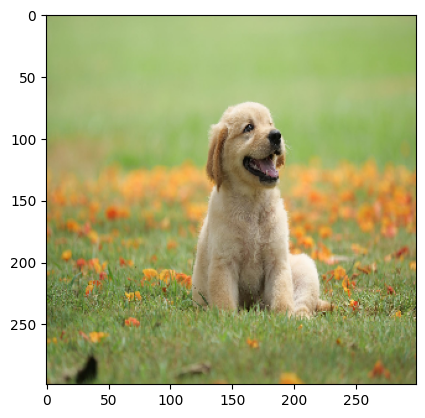

In [ ]:
#For Inceptionv3
image = cv2.resize(image, (299, 299))
plt.imshow(image.astype(np.int))

<ipython-input-9-e879e7830dad>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(image.astype(np.int))


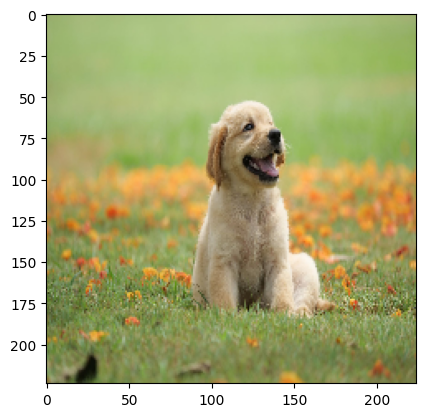

In [ ]:
# For Resnet and VGG
image = cv2.resize(image, (224, 224))
plt.imshow(image.astype(np.int))

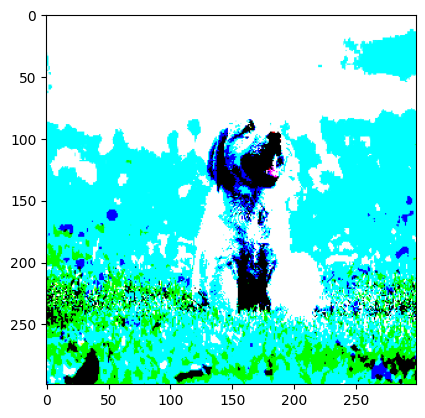

In [ ]:
image_pre = tf.keras.applications.resnet50.preprocess_input(image)
plt.imshow(image_pre)

In [ ]:
image_pre = np.expand_dims(image_pre, axis=0)

In [ ]:
image_pre.shape

(1, 224, 224, 3)

In [ ]:
result = resnet.predict(image_pre)

1/1 [==============================] - 9s 9s/step


In [ ]:
tf.keras.applications.resnet50.decode_predictions(result)

35363/35363 [==============================] - 0s 0us/step


[[('n02113799', 'standard_poodle', 0.7025159),
  ('n02099601', 'golden_retriever', 0.21005425),
  ('n02099712', 'Labrador_retriever', 0.059220795),
  ('n02113712', 'miniature_poodle', 0.011174985),
  ('n02102318', 'cocker_spaniel', 0.004346096)]]



*   The resnet model confuses between standard poodle and Golden Retreiver.



In [ ]:
# Important pretrained models :Inception, ResNet, EfficientNet, Xception
# List of all pretrained models - https://www.tensorflow.org/api_docs/python/tf/keras/applications

Loading the models without top layers (dense and output layers)

In [ ]:
vgg_no_top    = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3))
resnet_no_top = tf.keras.applications.ResNet50(include_top=False, input_shape = (224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
vgg_no_top.input_shape  , vgg_no_top.output_shape

((None, 224, 224, 3), (None, 7, 7, 512))

In [ ]:
resnet_no_top.input_shape  ,  resnet_no_top.output_shape

((None, 224, 224, 3), (None, 7, 7, 2048))

In [ ]:
# while ensembling we will face 3 issues -
# 1. What is the merge of VGG + Resnet (how can we merge 7*7*512 & 7*7*2048) -> GAP (Global Avg Pooling) & Concat
# 2. Resnet & VGG have different input pre-processing function, which one will
#    we pass in IDG?? -> Lambda

In [ ]:
#Downloading Dog Breed Data

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle competitions download -c dog-breed-identification

 98% 680M/691M [00:06<00:00, 118MB/s]
100% 691M/691M [00:06<00:00, 112MB/s]


In [ ]:
!unzip -q dog-breed-identification.zip

In [ ]:
data = pd.read_csv("labels.csv")
data["id"] = data["id"] + ".jpg"
data.sample(5)

id          breed
5557  8c547b5df1aff986fa67f9efc97459b9.jpg       leonberg
84    0206c12e8984e3c8a166cc272de25d6f.jpg      chihuahua
8760  db80c33cdf2c6723380d77e0f7bc7abe.jpg       bluetick
1093  1b26fc0e227488f288c753c84a88ca6c.jpg  saint_bernard
6836  abb198660ee09c413223848381046ace.jpg   walker_hound

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1, rotation_range=30, horizontal_flip=True)

In [ ]:
batch_size = 64

In [ ]:
train_idg = idg.flow_from_dataframe(data, "train/", "id", "breed",
                                    target_size=(375, 500), batch_size=batch_size,
                                    subset="training")

Found 9200 validated image filenames belonging to 120 classes.


In [ ]:
val_idg = idg.flow_from_dataframe(data, "train/", "id", "breed",
                                  target_size=(375, 500), batch_size=batch_size,
                                  subset="validation")

Found 1022 validated image filenames belonging to 120 classes.


In [ ]:
#How Ensemble of 2 Pre-Trained works:

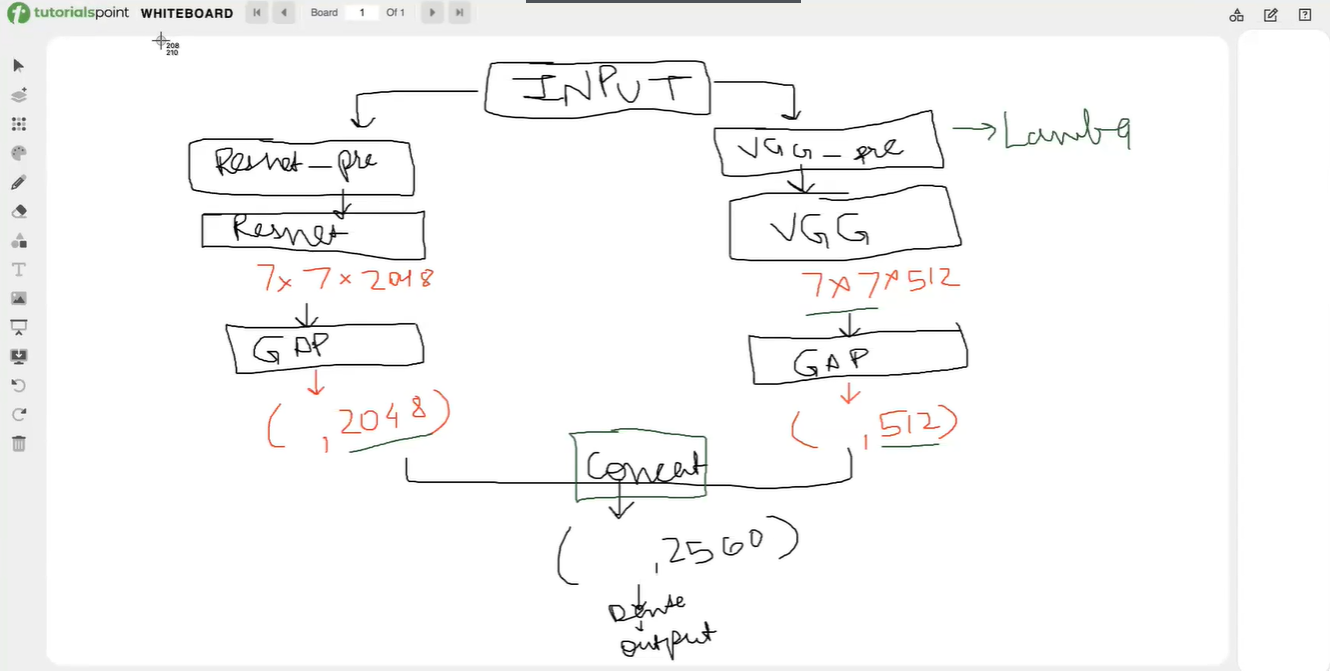

**VGG + Resnet50 Model :**

In [ ]:
from keras.utils.traceback_utils import include_frame
# 1. Input Layer
input = tf.keras.layers.Input((224, 224, 3), name="InputLayer")

# 2. VGG
# 2.1 Pre Processing of VGG using Lambda layer
vgg_pre_process = tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, name="VGGPreProcess") (input)
# 2.2 Get VGG model
vgg_model = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3))
vgg_model.trainable = False

vgg = vgg_model (vgg_pre_process)

# 2.3 Global Avg Pooling
vgg_avg = tf.keras.layers.GlobalAveragePooling2D(name="VGGGAP") (vgg)


# 3. Resnet
# 3.1 Pre Processing of Resnet using Lambda Layer
resnet_pre_process = tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input, name="ResnetPreProcess") (input)
# 3.2 Get Resnet50 model
resnet_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False

resnet = resnet_model (resnet_pre_process)

# 3.3 Global Avg Pooling
resnet_avg = tf.keras.layers.GlobalAveragePooling2D(name="ResnetGAP") (resnet)


# 4. Concat
concat = tf.keras.layers.Concatenate(name="Concat") ([vgg_avg, resnet_avg])
# add dropout
dropout = tf.keras.layers.Dropout(0.5, name="Dropout") (concat)

dense = tf.keras.layers.Dense(256, activation="relu", name="Dense1") (dropout)
output = tf.keras.layers.Dense(120, activation="softmax", name="Output") (dense)

**VGG + InceptionV3 Model :**

In [ ]:
#1. Input Layer:
input = tf.keras.layers.Input((299, 299, 3), name="InputLayer")

#2.VGG Model :
# 2.1 Pre Processing of VGG using Lambda layer
vgg_pre_process = tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, name="VGGPreProcess") (input)
# 2.2 Get VGG model
vgg_model = tf.keras.applications.VGG16(include_top=False, input_shape=(299, 299, 3))
vgg_model.trainable = False

vgg = vgg_model (vgg_pre_process)

# 2.3 Global Avg Pooling
vgg_avg = tf.keras.layers.GlobalAveragePooling2D(name="VGGGAP") (vgg)

#3.InceptionV3 Model:
# 3.1 Pre Processing of InceptionV3 using Lambda Layer
inceptionv3_pre_process = tf.keras.layers.Lambda(tf.keras.applications.inception_v3.preprocess_input,name="InceptionV3") (input)
# 3.2 Get InceptionV3 model
inceptionv3_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,input_shape=(299,299,3))
inceptionv3_model.trainable = False

inceptionv3 = inceptionv3_model (inceptionv3_pre_process)

#3.3 Global Average Pooling
inceptionv3_avg = tf.keras.layers.GlobalAveragePooling2D(name="InceptionV3Gap") (inceptionv3)

# 4. Concat
concat = tf.keras.layers.Concatenate(name="Concat") ([vgg_avg, inceptionv3_avg])
# add dropout
dropout = tf.keras.layers.Dropout(0.5, name="Dropout") (concat)

dense = tf.keras.layers.Dense(256, activation="relu", name="Dense1") (dropout)
output = tf.keras.layers.Dense(120, activation="softmax", name="Output") (dense)

87910968/87910968 [==============================] - 3s 0us/step


Resnet50 + InceptionV3

In [ ]:
#1. Input Layer
input = tf.keras.layers.Input((375,500,3),name="InputLayer")

#2. Resnet50
#2.1 Resnet50 Pre Processing using Lambda Layer
resnet50_pre_process = tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input,name="Resnet50PreProcess") (input)
#2.2 Get Resnet50 Model
resnet50_model = tf.keras.applications.ResNet50(include_top=False , input_shape=(375,500,3))
resnet50_model.trainable= False

resnet50 = resnet50_model (resnet50_pre_process)
#2.3 Global Average Pooling
resnet50_avg = tf.keras.layers.GlobalAveragePooling2D(name="Resnet50GAP") (resnet50)

#3. InceptionV3
#3.1 InceptionV3 PreProcessing using Lambda Layer
inceptionv3_pre_process = tf.keras.layers.Lambda(tf.keras.applications.inception_v3.preprocess_input,name="InceptionV3PreProcess") (input)
#3.1 Get InceptionV3
inceptionv3_model = tf.keras.applications.InceptionV3(include_top = False, input_shape=(375,500,3))
inceptionv3_model.trainable =False

inceptionV3 = inceptionv3_model (inceptionv3_pre_process)
#3.3 Global Average Pooling
inceptionv3_avg = tf.keras.layers.GlobalAveragePooling2D(name="InceptionV3Gap") (inceptionV3)

# 4. Concat
concat = tf.keras.layers.Concatenate(name="Concat") ([resnet50_avg, inceptionv3_avg])
#5. Dropout Layer
dropout = tf.keras.layers.Dropout(rate=0.5, name="Dropout") (concat)

#Dense Layers
dense = tf.keras.layers.Dense(256, activation="relu", name="Dense1") (dropout)
output = tf.keras.layers.Dense(120, activation="softmax", name="Output") (dense)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
final_model = tf.keras.models.Model(inputs= [input],
                                    outputs= [output])

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None, 375, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 Resnet50PreProcess (Lambda)    (None, 375, 500, 3)  0           ['InputLayer[0][0]']             
                                                                                                  
 InceptionV3PreProcess (Lambda)  (None, 375, 500, 3)  0          ['InputLayer[0][0]']             
                                                                                                  
 resnet50 (Functional)          (None, 12, 16, 2048  23587712    ['Resnet50PreProcess[0][0]'] 

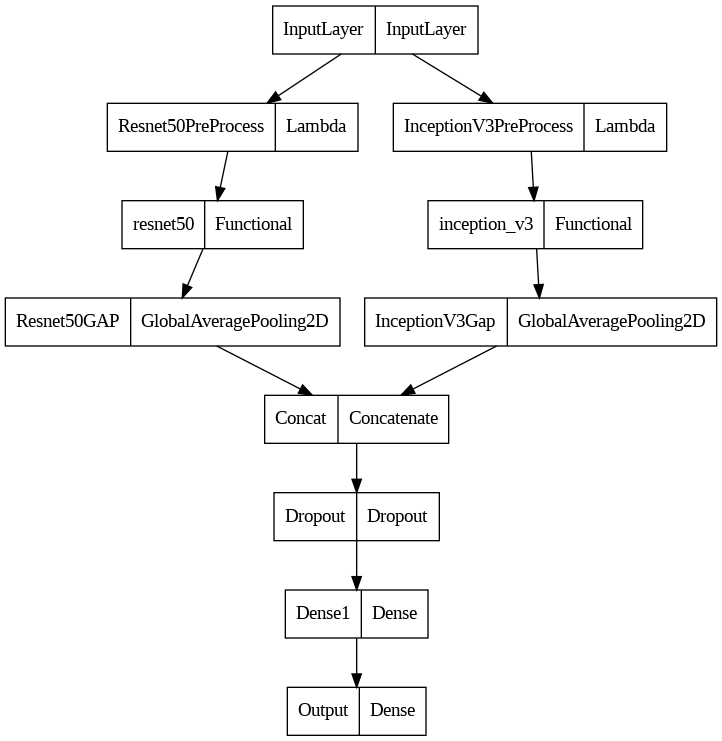

In [ ]:
#Plotting Model
tf.keras.utils.plot_model(final_model)

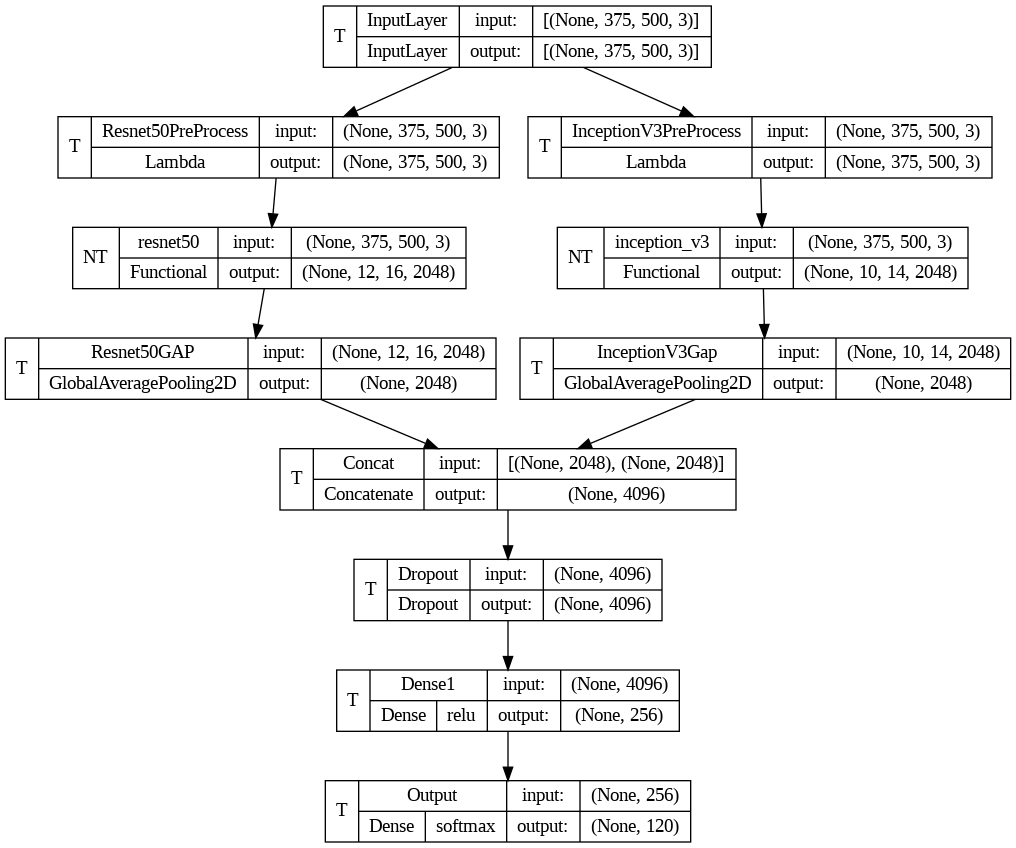

In [ ]:
tf.keras.utils.plot_model(final_model,show_shapes=True,show_layer_names=True,show_layer_activations=True,show_trainable=True)
# T is for Trainable and NT is for Not Trainable if they have thos property, However we have only Dense and Output Layer as Trainable

In [ ]:
final_model.compile(optimizer=tf.keras.optimizers.SGD(),
                    loss=tf.keras.losses.categorical_crossentropy,
                    metrics = ["acc"])

In [ ]:
final_model.fit(train_idg, batch_size=batch_size, epochs=20,
                validation_data=val_idg)

Epoch 1/20
144/144 [==============================] - 559s 4s/step - loss: 4.7482 - acc: 0.0267 - val_loss: 4.4984 - val_acc: 0.0920
Epoch 2/20
144/144 [==============================] - 489s 3s/step - loss: 4.3434 - acc: 0.0943 - val_loss: 3.9542 - val_acc: 0.2515
Epoch 3/20
144/144 [==============================] - 487s 3s/step - loss: 3.7244 - acc: 0.2352 - val_loss: 3.2278 - val_acc: 0.4139
Epoch 4/20
144/144 [==============================] - 486s 3s/step - loss: 3.0452 - acc: 0.3822 - val_loss: 2.5449 - val_acc: 0.5665
Epoch 5/20
144/144 [==============================] - 488s 3s/step - loss: 2.4116 - acc: 0.5079 - val_loss: 2.0056 - val_acc: 0.6791
Epoch 6/20
144/144 [==============================] - 488s 3s/step - loss: 1.9437 - acc: 0.5973 - val_loss: 1.6025 - val_acc: 0.7123
Epoch 7/20
144/144 [==============================] - 492s 3s/step - loss: 1.6040 - acc: 0.6661 - val_loss: 1.3469 - val_acc: 0.7750
Epoch 8/20
144/144 [==============================] - 514s 4s/step - 

In [ ]:

#Plotting Acc vs Val Graph
plt.plot(final_model.history.history['acc'],label='Training Acc')
plt.plot(final_model.history.history['val_acc'],label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy of Model")

In [ ]:
#Plotting Losses (In DL We focus on Losses over accuracy)
plt.plot(final_model.history.history['loss'],label='Loss')
plt.plot(final_model.history.history['val_loss'],label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses of Model')

**InceptionV3 Model :**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
data=pd.read_csv('labels.csv')
data['id'] = data['id']+'.jpg'
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
                                                            validation_split=0.1,
                                                            width_shift_range=0.1,
                                                            # height_shift_range=0.2,
                                                            # zoom_range=0.2,
                                                            horizontal_flip=True,
                                                            rotation_range=0.2)
target_size = (299,299)
batch_size = 64
train_idg = idg.flow_from_dataframe(data, 'train/',
                                    x_col='id', y_col='breed',
                                    target_size=target_size,
                                    batch_size=batch_size,
                                    subset='training')
val_idg = idg.flow_from_dataframe(data, 'train/',
                                  x_col='id', y_col='breed',
                                  target_size = target_size,
                                  batch_size=batch_size,
                                  subset='validation')
inceptionv3_model = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                         input_shape=(299,299,3))
inceptionv3_model_0 = tf.keras.models.Model(inputs=[inceptionv3_model.input], outputs=[inceptionv3_model.get_layer('avg_pool').output])
inceptionv3_model_0.trainable=False
# Dense1 = tf.keras.layers.Dense(1024, activation='relu', name='Dense1') (inceptionv3_model_0.output)
output = tf.keras.layers.Dense(120, activation='softmax', name='Output') (inceptionv3_model_0.output)
final_model = tf.keras.models.Model(inputs=[inceptionv3_model_0.input], outputs=[output])
final_model.compile(optimizer=tf.keras.optimizers.SGD(),
                    loss = tf.keras.losses.categorical_crossentropy,
                    metrics=['acc'])
final_model.fit(train_idg, batch_size=batch_size, epochs=20, validation_data=val_idg)

Found 9200 validated image filenames belonging to 120 classes.
Found 1022 validated image filenames belonging to 120 classes.
96112376/96112376 [==============================] - 5s 0us/step
Epoch 1/20
144/144 [==============================] - 264s 2s/step - loss: 4.3868 - acc: 0.1654 - val_loss: 3.9414 - val_acc: 0.3845
Epoch 2/20
144/144 [==============================] - 232s 2s/step - loss: 3.5157 - acc: 0.5508 - val_loss: 3.1475 - val_acc: 0.6448
Epoch 3/20
144/144 [==============================] - 229s 2s/step - loss: 2.7767 - acc: 0.7234 - val_loss: 2.4887 - val_acc: 0.7505
Epoch 4/20
144/144 [==============================] - 229s 2s/step - loss: 2.1810 - acc: 0.7939 - val_loss: 1.9843 - val_acc: 0.8112
Epoch 5/20
144/144 [==============================] - 229s 2s/step - loss: 1.7306 - acc: 0.8323 - val_loss: 1.6016 - val_acc: 0.8327
Epoch 6/20
144/144 [==============================] - 229s 2s/step - loss: 1.3998 - acc: 0.8546 - val_loss: 1.3326 - val_acc: 0.8474
Epoch 7/20


In [ ]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
tf.keras.utils.plot_model(final_model,show_shapes=True,show_layer_names=True,show_layer_activations=True,show_trainable=True)